[[ 0. -1.  0.]
 [-1.  5. -1.]
 [ 0. -1.  0.]]


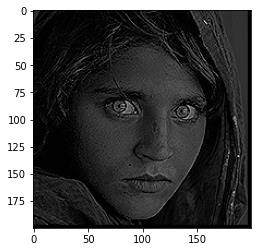

In [27]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt

# Code for image convolution with a 3x3 kernel
def convolve(img, kernel):
    # Get the image dimensions
    img_height = img.shape[0]
    img_width = img.shape[1] 
    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    # Create an empty image to store the output
    output = np.zeros((img_height, img_width))

    k = kernel.shape[0]
    # Loop through every pixel of the image
    for x in range(img_height-kernel_height):
        for y in range(img_width-kernel_width):

            mat = img[y:y+k, x:x+k]
            output[y,x] = np.sum(np.multiply(mat, kernel))

            # Make sure there are no negative values
            if(output[y,x] < 0):
                output[y,x] = 0
           
    return output

kernel = np.array(([0,-1,0],[-1,5,-1],[0,-1,0]), dtype=np.float32)
print(kernel)

#Saving and displaying an image
img = cv2.imread('Graphics/face_conv.png')

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

convolve_image = convolve(img, kernel)

plt.imshow(convolve_image, cmap='gray')